# **DATA VISUALISATION**
Data Visualization is the graphical representation of information and data using visual elements like charts, graphs, maps, and infographics. It transforms raw data into a visual context, making it easier to identify trends, patterns, outliers, and insights that might not be immediately apparent in raw datasets.



Now in this we are going to import the required data set

In [ ]:
!gdown https://drive.google.com/file/d/1KOkoHrIjOFIJEd9ztrNzjk46mOEqb7Pq/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1KOkoHrIjOFIJEd9ztrNzjk46mOEqb7Pq
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1KOkoHrIjOFIJEd9ztrNzjk46mOEqb7Pq/view?usp=sharing
To: /content/view?usp=sharing
92.4kB [00:00, 50.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


what are the required libraries

In [ ]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

we have given a name to the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

How can we visualize the distribution of the bmi column from a DataFrame using Seaborn, and what insights can we derive from the resulting plot?"

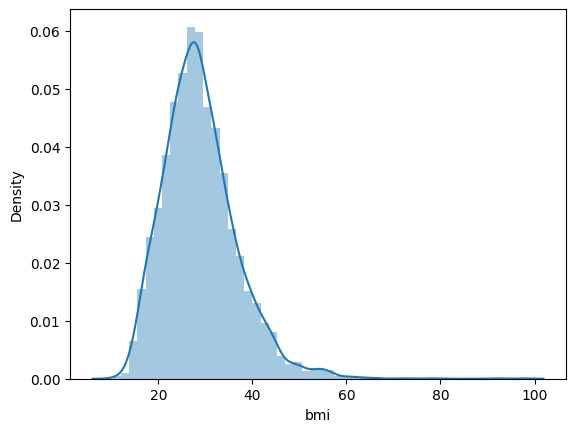

In [ ]:
sns.distplot(df['bmi'])
plt.show()

How can we group the data by gender and count the occurrences of different heart_disease values within each gender category?



In [ ]:
df.groupby('gender')['heart_disease'].value_counts()

gender  heart_disease
Female  0                2881
        1                 113
Male    0                1952
        1                 163
Other   0                   1
Name: count, dtype: int64

How can we create a bar chart to compare the distribution of heart_disease occurrences across different gender categories using a crosstab in pandas?

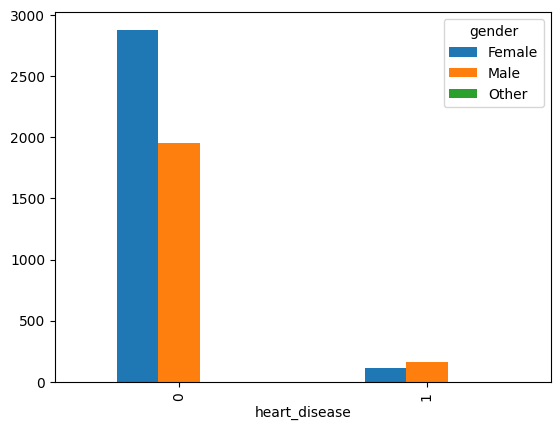

In [ ]:
pd.crosstab(df['heart_disease'],df['gender']).plot(kind='bar')
plt.show()

How can we use a boxplot to compare the distribution of gender with respect to the presence or absence of stroke in the dataset?



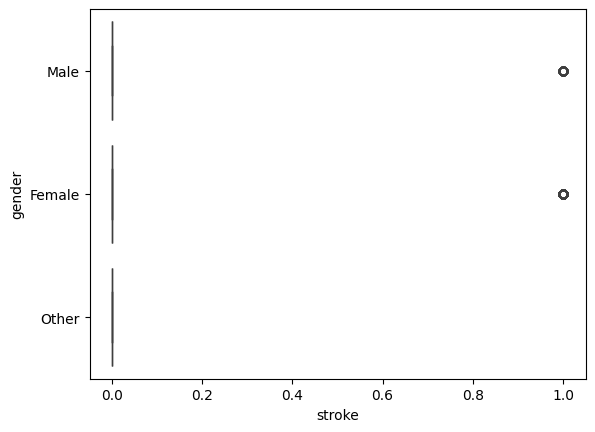

In [ ]:
sns.boxplot(x='stroke',y ='gender', data = df)
plt.show()

How can we visualize the relationship between bmi and stroke in the dataset using a scatter plot?

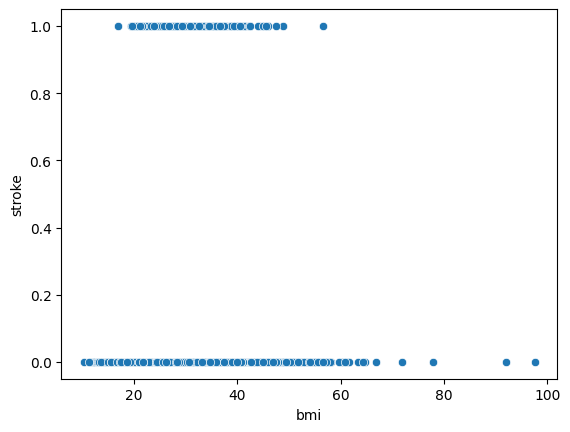

In [ ]:
sns.scatterplot(data = df, x ='bmi', y = 'stroke')
plt.show()

How can we visualize the distribution of stroke in the dataset as a pie chart, showing the percentage of each category?

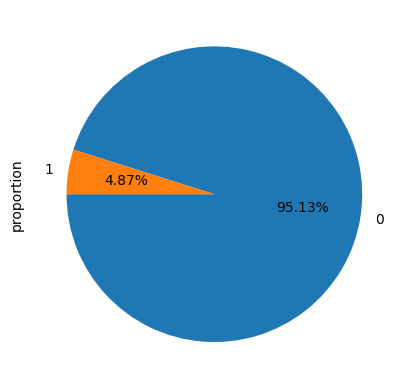

In [ ]:
df['stroke'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%',startangle=180)
plt.show()

# **DATA ENCODING**
Data Encoding is the process of converting categorical or non-numeric data into a numerical format so that it can be easily understood and processed by machine learning algorithms

How can we create a new binary column based on the values of the single column, where 'Urban' is encoded as 1 and 'Rural' as 0?

In [ ]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


How can we convert categorical columns into binary columns using one-hot encoding while dropping the first category to avoid multicollinearity, and what does the resulting DataFrame look like?

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1401,2772,55.0,0,0,87.72,27.0,0,1,True,False,True,False,True,False,False,True,False,False,False
5061,38009,41.0,0,0,223.78,32.3,0,1,True,False,True,False,True,False,False,True,False,True,False
3696,53476,31.0,0,0,90.00,38.6,0,1,False,False,True,False,True,False,False,True,False,True,False
2146,7868,13.0,0,0,108.33,17.4,0,0,True,False,False,False,False,False,True,False,False,True,False
4578,64155,60.0,0,0,200.25,33.1,0,0,True,False,True,False,False,False,False,False,False,True,False


How can we apply LabelEncoder to all columns in a DataFrame to convert categorical values into numerical labels?

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


dff=df.apply(le.fit_transform)

How can we display the first 10 rows of the DataFrame dff after applying LabelEncoder to transform all categorical columns into numerical labels?

In [ ]:
dff.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,671,88,0,1,3850,239,1,1,1,0,1,0,1,0,0,1,1,0,0
1,3610,82,0,0,3588,418,1,0,0,0,1,0,0,1,0,0,0,1,0
2,2151,101,0,1,2483,198,1,0,1,0,1,0,1,0,0,0,0,1,0
3,4226,70,0,0,3385,217,1,1,0,0,1,0,1,0,0,1,0,0,1
4,114,100,1,0,3394,113,1,0,0,0,1,0,0,1,0,0,0,1,0
5,3970,102,0,0,3448,163,1,1,1,0,1,0,1,0,0,1,1,0,0
6,3766,95,1,1,588,147,1,0,1,0,1,0,1,0,0,0,0,1,0
7,748,90,0,0,1951,101,1,1,0,0,0,0,1,0,0,1,0,1,0
8,1894,80,0,0,912,418,1,0,0,0,1,0,1,0,0,0,0,0,0
9,4243,99,0,0,126,115,1,1,0,0,1,0,1,0,0,1,0,0,0


What does the train_test_split function do, and how does it divide the data into training and testing subsets?

In [ ]:
from sklearn.model_selection import train_test_split

How can we separate the features (input variables) and the target (output variable) in the dataset, where stroke is the target variable?

In [ ]:
x=dff.drop('stroke', axis='columns')
y=dff.stroke

What does the code train_test_split(x, y, test_size=0.2) do, and how does it divide the data into training and test subsets?

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

How can we initialize a Linear Regression model in scikit-learn and use it to predict outcomes based on training data

In [ ]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

How does the fit() method of a Linear Regression model train the model using the training data, and what happens during the fitting process

In [ ]:
clf.fit(x_train, y_train)

LinearRegression()

How can we evaluate the performance of a Linear Regression model using the score() method, and what does the R² value indicate about the model's accuracy?



In [ ]:
accuracy = clf.score(x_test, y_test)

How can we convert the R² value into a percentage to represent the accuracy of the Linear Regression model, and why is this useful

In [ ]:
accuracy*100

6.9756743096427325